# CC5215: Privacidad de Datos
## Proyecto grupal - Entregable 1

## Miembros del grupo

Ingrese los nombres de lxs miembros del grupo. Recuerde que el grupo debe tener 3 o 4 miembros y la constitución del grupo **no se puede cambiar** a lo largo de los distintos entregables.

*   Miembro 1: Diego Espinoza
*   Miembro 2: Lucas Orellana
*   Miembro 3: Tomás Escobar
*   Miembro 4: Jorge Feliú


## Objetivo general
El objetivo de esta primera parte del trabajo grupal es que identifiquen un dataset público con información sensible de individuos, donde el dataset sea susceptible a violaciones de la privacidad, y propongan un método de publicación del dataset que evite estas violaciones de privacidad.

## Código entregado
Todas las funciones que defina deben estar documentadas, indicando su funcionamiento (entrada, salida, objetivo).

## Parte 1: Identificación del dataset [15 Puntos]
Identifique un dataset de dominio público, con información sensible de individuos. El dataset no debe contener ningún identificador explícito.

Como fuente de datasets, le podrían ser útiles las siguientes páginas web:
*   https://www.kaggle.com/
*   https://datos.gob.cl/
*   https://www.consejotransparencia.cl/datosabiertos/

Note que esta páginas son sólo sugerencias; pueden obtener su datasets de cualquier fuente públicamente accesible.

**Datasets de ejemplo** (No puede elegir estos):

* https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland
* https://www.kaggle.com/datasets/tagotero/chile-plebiscito-2020-participacion-servel

### Librerías y Funciones

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
import kagglehub

# En caso de querer usar Drive:
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/MyDrive/proyecto_privacidad_de_datos/'

# Usando directamente el dataset en la página web
path = kagglehub.dataset_download("miadul/tuberculosis-x-ray-dataset-synthetic")

100%|██████████| 258k/258k [00:00<00:00, 59.4MB/s]

Extracting files...


In [2]:
# Crearemos una función exploratoria para hacer un primer análisis del dataset a usar
def exploratory_data_analysis(df):
    '''
    Permite realizar un análisis exploratorio de los datos a un cierto dataframe,
    viendo cantidad de datos, columnas presentes, descripción numérica, nulos, entre otros.

    Argumentos
        - df: dataset a examinar
    '''
    print('1.- El dataframe tiene ', len(df), 'filas y ', df.shape[1], ' columnas')
    print('2.- El dataframe esta compuesto por las siguientes columnas:', list(df.columns))
    print('3.- Ejemplos de filas del dataframe: \n'
          'Primeras 5 filas')
    display(df.head(5))
    print('Últimas 5 filas:')
    display(df.tail(5))
    print('Muestreo aleatorio de 5 filas:')
    display(df.sample(5))
    print('4.- Descripción numérica del dataframe:')
    display(df.describe())
    print('5.- Cantidad de valores nulos por columna:')
    display(df.isna().sum())
    print('6.- Cantidad de valores únicos por columna:')
    display(df.nunique())

# Vamos a crear una función que nos permita ver valores únicos en columnas
def see_unique_values(df, columns):
    '''
    Permite ver los valores únicos de la/s columna/s seleccionada/s por el usuario.

    Argumentos
        - df: dataset a examinar
        - columns: lista de columnas a examinar
    '''
    for column in columns:
        unique_values = df[column].unique()
        print(f"Valores únicos en la columna '{column}':")
        print(unique_values, '\n')

# Y otra función para contar registros en función de algún valor específico
def count_registers(df, column, value):
    '''
    Permite contar cuántos registros existen en donde 'column' == 'value'

    Argumentos
        - df: dataset a examinar
        - column: columna a examinar
        - value: valor a comparar
    '''
    count = df[df[column] == value].shape[0]
    print(f"Cantidad de registros con {column} == {value}: {count}")

### Elección de dataset y limpieza

Limpie el dataset, eliminando las columnas que no sean de interés para este trabajo grupal, los registros que estén incompletos (con e.g. nan o null en alguna de sus celdas) y, en caso de que sea necesario, formateando (correcta y uniformemente) las celdas que presenten problemas.

Justifique cada modificación al dataset, especialmente la eliminación de columnas.

In [3]:
# Cargamos el dataset para trabajar
df_path = path + '/tuberculosis_xray_dataset.csv'
df = pd.read_csv(df_path)

Partamos entonces con un análisis exploratorio:

In [4]:
exploratory_data_analysis(df)

1.- El dataframe tiene  20000 filas y  15  columnas
2.- El dataframe esta compuesto por las siguientes columnas: ['Patient_ID', 'Age', 'Gender', 'Chest_Pain', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Weight_Loss', 'Fever', 'Night_Sweats', 'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History', 'Previous_TB_History', 'Class']
3.- Ejemplos de filas del dataframe: 
Primeras 5 filas


,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


Últimas 5 filas:


,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
19995,PID019996,53,Male,No,0,4,6,11.72,Moderate,Yes,Medium,No,Never,Yes,Normal
19996,PID019997,27,Female,No,3,1,1,5.67,Moderate,Yes,Low,Yes,Current,Yes,Tuberculosis
19997,PID019998,23,Male,No,1,2,8,3.91,High,Yes,Low,Yes,Never,No,Normal
19998,PID019999,24,Female,No,8,4,6,8.77,Moderate,Yes,Medium,Yes,Never,Yes,Normal
19999,PID020000,48,Male,No,9,4,4,4.84,High,No,High,No,Never,Yes,Normal


Muestreo aleatorio de 5 filas:


,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
5306,PID005307,30,Female,No,9,1,9,11.41,Moderate,Yes,Low,No,Former,Yes,Normal
16332,PID016333,87,Female,Yes,9,1,4,9.79,Mild,No,Low,No,Former,No,Normal
6824,PID006825,20,Female,No,1,4,5,7.05,Moderate,Yes,Medium,No,Former,No,Normal
9724,PID009725,44,Female,No,5,4,0,5.22,Moderate,Yes,Medium,No,Former,No,Tuberculosis
19894,PID019895,42,Male,Yes,7,0,6,10.79,Mild,No,Medium,No,Never,Yes,Normal


4.- Descripción numérica del dataframe:


,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.467450,4.491350,2.003450,4.508450,7.455281
std,20.773984,2.864723,1.417123,2.881552,4.339864
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,2.000000,3.640000
50%,53.000000,4.000000,2.000000,5.000000,7.490000
75%,71.000000,7.000000,3.000000,7.000000,11.200000
max,89.000000,9.000000,4.000000,9.000000,15.000000


5.- Cantidad de valores nulos por columna:


,0
Patient_ID,0
Age,0
Gender,0
Chest_Pain,0
Cough_Severity,0
Breathlessness,0
Fatigue,0
Weight_Loss,0
Fever,0
Night_Sweats,0


6.- Cantidad de valores únicos por columna:


,0
Patient_ID,20000
Age,72
Gender,2
Chest_Pain,2
Cough_Severity,10
Breathlessness,5
Fatigue,10
Weight_Loss,1501
Fever,3
Night_Sweats,2


Podemos ver que el dataset se conforma de $20.000$ registros con $15$ características, dentro de los cuales encontramos la edad, género, si la persona presenta fiebre, entre otros. El dato importante acá es que estos registros muestran también si la persona presenta tuberculosis.

Algunos datos importantes que podemos notar:
- Tenemos $20.000$ registros que corresponden a $20.000$ personas distintas.
- Todos los datos están completos, por lo que tenemos toda la información disponible de cada registro.
- Los registros corresponden a personas que van desde los $18$ hasta los $89$ años.

In [5]:
columns = df.columns
columns = columns.drop(['Patient_ID', 'Weight_Loss'])

for column in columns:
    see_unique_values(df, [column])

Valores únicos en la columna 'Age':
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27] 

Valores únicos en la columna 'Gender':
['Male' 'Female'] 

Valores únicos en la columna 'Chest_Pain':
['Yes' 'No'] 

Valores únicos en la columna 'Cough_Severity':
[1 3 7 2 0 5 8 9 6 4] 

Valores únicos en la columna 'Breathlessness':
[2 0 3 1 4] 

Valores únicos en la columna 'Fatigue':
[3 9 6 5 7 0 1 2 8 4] 

Valores únicos en la columna 'Fever':
['Moderate' 'Mild' 'High'] 

Valores únicos en la columna 'Night_Sweats':
['Yes' 'No'] 

Valores únicos en la columna 'Sputum_Production':
['Medium' 'High' 'Low'] 

Valores únicos en la columna 'Blood_in_Sputum':
['Yes' 'No'] 

Valores únicos en la columna 'Smoking_History':
['Former' 'Current' 'Never'] 

Valores únicos en la columna 'Previous_TB_History':
['Yes' 'No'] 

Valores únicos en

Dado que ya vimos los valores de las columnas más significativas, de las $15$ columnas que tenemos, eliminaremos las siguientes (dado que no representan mucha información de utilidad):

- `Cough_Severity`: es probable que esté correlacionado con `Class`, por lo que no nos interesa tenerlo.
- `Fatigue`: es un valor subjetivo y bastante difícil de vincular con la identidad de una persona.
- `Breathlessness`: mismo caso que `Fatigue`.
- `Sputum_Production`: es demasiado específico y poco identificador.
- `Night_Sweats`: por simplicidad podemos eliminarlo.

In [6]:
dataset = df.drop(['Cough_Severity', 'Fatigue', 'Breathlessness', 'Sputum_Production', 'Night_Sweats'], axis=1)
dataset.head()

,Patient_ID,Age,Gender,Chest_Pain,Weight_Loss,Fever,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,2.37,Moderate,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,6.09,Moderate,No,Current,Yes,Normal
2,PID000003,89,Male,No,2.86,Mild,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,4.57,Moderate,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,13.86,High,No,Never,Yes,Tuberculosis


### Explicación final y categorización columnas

Describa coloquialmente los datos que contiene el dataset (de dónde fueron obtenidos, qué representa cada columna, etc.)

Este dataset lleva por nombre **Tuberculosis X-Ray Dataset**, el cual fue obtenido desde [Kaggle](https://www.kaggle.com/datasets/miadul/tuberculosis-x-ray-dataset-synthetic) y representa $20.000$ datos **sintéticos** sobre pacientes que pueden o no presentar tuberculosis. Las columnas originales de este dataset son:

- `Patient_ID`: permite identificar únicamente a cada paciente.
- `Age`: edad del paciente.
- `Gender`: género binario del paciente.
- `Chest_Pain`: presencia o no de dolor en el pecho
- `Cough_Severity`: valor numérico que representa la severidad de la tos.
- `Breathlessness`: valor numérico que representa la falta de aire del paciente.
- `Fatigue`: valor numérico que representa el nivel de fatiga que siente el paciente.
- `Weight_Loss`: cantidad de peso perdido (en kg.)
- `Fever`: nivel de fiebre del paciente
- `Night_Sweats`: representa si el paciente presenta o no sudor mientras duerme.
- `Sputum_Production`: el paciente tiene flemas o no.
- `Blood_in_Sputum`: el paciente tiene sangre en las flemas o no.
- `Smoking_History`: representa si el paciente fuma o no, y con qué frecuencia.
- `Previous_TB_History`: representa si el paciente tiene o no algún historial anterior relacionado a tuberculosis.
- `Class`: representa si el paciente tiene o no tuberculosis.

Clasifique cada columna en cuasi-identificador, atributo sensible y atributo no-sensible. Si lo desea, puede simplificar el trabajo directamente eliminando los atributos no-sensibles del dataset.

Justifique su razonamiento para decidir si una columna es un cuasi-identificador.

**Identificador**
- `Patient_ID`: Identificador directo del paciente.

**Cuasi-Identificadores**
- `Age`: por sí sola puede parecer insignificante, pero combinado con otros datos es posible de reducir los grupos de personas. Por ejemplo, una persona mayor puede ser más propensa a tener algunas enfermedades, presentando características que pueden ser indicativas de tuberculosis.
- `Gender`: lo mismo que `Age` en el sentido de acotar grupos de riesgo.
- `Chest_Pain`: es un dato muy consultado en otras enfermedades y que se tiende a reportar debido a su simplicidad
- `Weight_Loss`: es posible considerar la pérdida de peso como un cuasi-identificador si consideramos la posibilidad de que las personas publiquen en redes sociales sus bajas de peso, o si existen valores extremos que nos ayuden a poder identificar a las personas (en el caso de que estos datos extremos sean únicos o muy escasos).
- `Smoking_History`: aunque este es un dato de salud, es algo común y no necesariamente sensible por sí solo, ya que refleja hábitos frecuentes y conocidos en muchos casos.
- `Previous_TB_History`: este dato puede ser usado para identificar dentro del entorno del paciente algún registro de tuberculosis previo, pudiendo identificar pacientes.

**Atributos Sensibles**
- `Fever`: Un síntoma clínico, categorizado en distintos niveles de intensidad. Su presencia puede ayudar a inferir la probabilidad de que una persona tenga una enfermedad
- `Blood_in_Sputum`: Es un síntoma muy específico de tuberculosis y otras enfermedades respiratorias graves.
- `Class`: Este es el atributo más sensible, ya que revela directamente el diagnóstico del paciente.

## Parte 2: Descripción del problema [15 Puntos]
Demuestre que existen potenciales violaciones de privacidad (recuerde que el requisito original era que el dataset escogido presente este tipo de problemas) y explique tanto su razonamiento para encontras dichas vulnerabilidades como los resultados obtenidos.



### Funciones

In [7]:
def compute_anonimity_index(df, qis):
    '''
    Permite calcular k-anónimo de un dataset usando cuasi-identificadores.

    Argumentos
        - df: dataset a examinar.
        - qis: lista de cuasi-identificadores a usar.

    Retorna
        - k: valor de k-anónimo.
    '''
    qis_count = df.groupby(qis, observed=True).size()
    k = qis_count.min()
    return k

def compute_diversity_index(df, qis, target):
    '''
    Calcula el valor de l-diversidad para el dataset dado según su atributo sensible.

    Argumentos
        - df: dataset a examinar.
        - qis: lista de cuasi-identificadores a usar.
        - target: atributo sensible objetivo.

    Retorna:
        - l: valor de l-diversidad.
    '''
    # Agrupamos por los QIs y contamos los valores únicos del atributo sensible
    diversity_counts = df.groupby(qis, observed=True)[target].nunique()

    # l-diversidad del dataset es el menor valor encontrado
    l = diversity_counts.min() if not diversity_counts.empty else 0

    return l

### Desarrollo para un ataque

Lo primero que podemos hacer para ver reales problemas a la violación de privacidad es ver los índices de anonimidad y de diversidad:

In [8]:
# Calculemos el k-anónimo considerando los cuasi-identificadores previos
quasi_identifiers = ['Age', 'Gender', 'Weight_Loss', 'Smoking_History', 'Previous_TB_History']
print(f'Valor de k-anónimo: {compute_anonimity_index(dataset, quasi_identifiers)}')

Valor de k-anónimo: 1


A primeras podemos ver que este dataset es bastante vulnerable al ser $1$-anónimo. Es decir, existe una combinación única de cuasi-identificadores que me sirven para identificar a una única persona.

In [10]:
# Calculemos el l-diversidad
print(f'Valor de l-diversidad: {compute_diversity_index(dataset, quasi_identifiers, "Class")}')

Valor de l-diversidad: 1


Así como tenemos $1$-anónimo, también el dataset presenta $1$-diversidad, por lo que definitivamente es bastante vulnerable a diferentes ataques. Veamos cuál (o cuáles) es el registro entonces que es más vulnerable:

In [13]:
# Ver el registro que cumple 1-anónimo
qis_count = df.groupby(quasi_identifiers, observed=True).size()
one_anon_qis = qis_count[qis_count == 1].index

registros = df[df[quasi_identifiers].apply(tuple, axis=1).isin(one_anon_qis)]
display(registros)

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,PID019996,53,Male,No,0,4,6,11.72,Moderate,Yes,Medium,No,Never,Yes,Normal
19996,PID019997,27,Female,No,3,1,1,5.67,Moderate,Yes,Low,Yes,Current,Yes,Tuberculosis
19997,PID019998,23,Male,No,1,2,8,3.91,High,Yes,Low,Yes,Never,No,Normal
19998,PID019999,24,Female,No,8,4,6,8.77,Moderate,Yes,Medium,Yes,Never,Yes,Normal


Para poder hacer la identificación correcta de estos individuos se puede recurrir para este caso a bases de datos de dominio público que estén relacionado a registros médicos y que consideren dentro de sus atributos los cuasi-identificadores que nombramos anteriormente.

Si queremos hacer un ataque de re-identificación, se podría hacer un cruce entre ambas tablas, manteniendo los atributos que ambas comparten y, en caso de ser necesario, haciendo una normalización de los valores encontrados en los datos auxiliares. En la parte bonus se dará un ejemplo de cómo esto es posible.

## Parte 2 (Bonus): Reidentificación de individuos [10 Puntos]
(Bonus) Monte un ataque para re-identificar tantos individuos como sea posible a partir de datos auxiliares. Puede montar un ataque de asociación de registros (donde asocia un individuo con un registro dado) o de asociación de atributo (donde descubre algún atributo sensible de un individuo, pero sin poder asociarlo a un registro concreto)


La amplia cantidad de quasi-identificadores presentes,el hecho de que es $1$-anónimo y $1$-diverso dicta la posibilidad de realizar dicho ataque, por lo que la tarea ahora es encontrar un dataset que comparta quasi-identificadores con el presente.


Habiendo encontrado el dataset `Lung Cancer Prediction` en [Kaggle](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link), que comparte quasi-identificadores, permitirá cargarlo y comparar estos, normalizando y vinculándolos entregaría un matching de casos posibles de reidentificación.

In [14]:
# Descarga del dataset

path2 = kagglehub.dataset_download("thedevastator/cancer-patients-and-air-pollution-a-new-link")

100%|██████████| 7.36k/7.36k [00:00<00:00, 8.97MB/s]

Extracting files...


In [15]:
# Carga del dataset

df2_path = path2 + '/cancer patient data sets.csv'
df2 = pd.read_csv(df2_path)
df2.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [16]:
# Buscamos el cruce de columnas entre ambos datasets
print(df2.columns)
print(df.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')
Index(['Patient_ID', 'Age', 'Gender', 'Chest_Pain', 'Cough_Severity',
       'Breathlessness', 'Fatigue', 'Weight_Loss', 'Fever', 'Night_Sweats',
       'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History',
       'Previous_TB_History', 'Class'],
      dtype='object')


In [17]:
# Observamos que las columnas en común son:
# - Age, Gender, Weight_Loss, Smoking_History, Chest_Pain, Fatigue

# Vamos a ver si podemos hacer un merge entre ambos datasets
# Solo usaremos las columnas que son comunes entre ambos datasets

data_tuber = df[['Age','Gender','Chest_Pain','Weight_Loss','Fatigue', 'Smoking_History']]
data_lung = df2[['Age','Gender','Chest Pain','Weight Loss','Fatigue', 'Smoking']]

In [18]:
# Ahora debemos renombrar las columnas para que sean iguales y normalizar los valores
# de los atributos que tienen valores diferentes pero significan lo mismo
data_lung.rename(columns={'Chest Pain': 'Chest_Pain', 'Weight Loss': 'Weight_Loss', 'Smoking': 'Smoking_History'}, inplace=True)

# Transformar los valores de edad para que se encuentren en rangos aumenta las reidentificaciones
# Dejar los datos tal cual están en cada dataset entrega una reidentificación más certera
#bins = [0, 18, 35, 50, 65, 80, 99, 150]
#labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-99', '100+']

#data_tuber['Age'] = pd.cut(data_tuber['Age'], bins=bins, labels=labels, right=False)
#data_lung['Age'] = pd.cut(data_lung['Age'], bins=bins, labels=labels, right=False)

# Gender tiene valores numericos en lung y string en tuber, 1 es Male y 2 es Female

data_lung['Gender'] = data_lung['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

# El chest pain tiene valores numericos en lung y string en tuber, desde 2 es Yes y si es 1 es No

data_lung['Chest_Pain'] = data_lung['Chest_Pain'].apply(lambda x: 'Yes' if x > 1 else 'No')

# El weight loss tiene valor categorico en lung, de 1 a 8 y en tuber es numerico, exacto en kg
# Vamos a transformar el weight loss en lung para que sea categorico en ambos.

ancho_intervalo = 15 / 8

bins = [0] + [round(ancho_intervalo * i, 3) for i in range(1, 9)]

labels = list(range(1, 9))

data_tuber['Weight_Loss'] = pd.cut(data_tuber['Weight_Loss'], bins=bins, labels=labels, include_lowest=True, right=True)

# Normalizamos los valores de la columna 'Smoking_History' para que sean iguales a los del dataset de tuberculosis,
# El criterio fue decidido basandose en el dataset de lung, smoking tiene valor categorico de 1 a 8, donde el autor indica que los valores menores a 5 implican que el paciente no fuma
# según la siguiente tabla:

mapping_smoking = {
    1: 'Never',
    2: 'Never',
    3: 'Former',
    4: 'Former',
    5: 'Current',
    6: 'Current',
    7: 'Current',
    8: 'Current'
}

# Reemplazar los valores en la columna 'Smoking_History'
data_lung['Smoking_History'] = data_lung['Smoking_History'].replace(mapping_smoking)

<ipython-input-18-c3be4b44eb1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lung.rename(columns={'Chest Pain': 'Chest_Pain', 'Weight Loss': 'Weight_Loss', 'Smoking': 'Smoking_History'}, inplace=True)
<ipython-input-18-c3be4b44eb1a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lung['Gender'] = data_lung['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
<ipython-input-18-c3be4b44eb1a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [19]:
# Ahora solo hace falta eliminar los registros duplicados y unir ambos datasets
data_tuber = data_tuber.drop_duplicates()
data_lung = data_lung.drop_duplicates()

# Unimos ambos datasets
common_keys = data_lung.columns.intersection(data_tuber.columns).tolist()

df_linked = pd.merge(data_lung,data_tuber, on=common_keys, how='inner')
df_linked = df_linked.drop_duplicates()

print("Cantidad de reidentificaciones:",len(df_linked))
df_linked.head()

Cantidad de reidentificaciones: 36


,Age,Gender,Chest_Pain,Weight_Loss,Fatigue,Smoking_History
0,33,Male,Yes,4,3,Former
1,35,Female,Yes,4,1,Current
2,64,Female,Yes,6,9,Current
3,19,Male,Yes,5,4,Never
4,33,Male,Yes,4,4,Former


Describa coloquialmente las re-identificaciones que logró hacer.

Tomamos ambos dataframes en los que identificamos atributos similares y normalizamos los datos para que se distribuyeran sobre datos del mismo tipo, esto permite a los dataframes a poseer valores que perfectamente podían existir en el otro dataframe. Una vez normalizados, fueron cruzados con un `merge` para rescatar aquellos registros equivalentes en los df normalizados, logrando así rescatar $36$ registros de posibles reidentificaciones.

## Parte 3: Anonimización [30 Puntos]

Utilice técnicas de anonimización para transformar el dataset de la Parte 1 (luego de la limpieza), en uno que sea robusto a los ataques que montó en la Parte 2. Para ello, transforme el dataset primero en uno $k$-anónimo, y luego en uno $\ell$-diverso, para valores que $k$ y $\ell$ que resulten en un tradeoff razonable entre privacidad y utilidad. Haga las generalizaciones de manera "informada", explorando las características de los valores atípicos.

Considere que los métodos de generalización vistos en clase pueden ser muy básicos para esta parte. Intente usar o crear mejores métodos de anonimización para lograr los objectivos de diversidad y anonimato. Documente su código.

### Funciones

In [20]:
# Pondré por mientras las funciones que hemos usado en labs anteriores:
def build_interval(value, interval_size):
    '''
    Construye un string que representa el intervalo al cual pertenece el valor.

    Argumentos
        - value: valor a analizar
        - interval_size: tamaño del intervalo

    Retorna
        - string que representa el intervalo al cual pertenece el valor
    '''
    start = (value // interval_size) * interval_size
    return f"[{start}, {start + interval_size})"

def generalize_by_intervals(df, col, interval_size):
    '''
    Retorna una copia de `df` donde la columna 'col' es generalizada de manera
    que cada valor sea transformado en un intervalo de tamaño `interval_size`

    Argumentos
        - df: dataframe a generalizar
        - col: columna a generalizar
        - interval_size: tamaño del intervalo

    Retorna
        - dataframe generalizado según lo requerido
    '''
    new_df = df.copy()
    # Asumimos que todas las columnas del dataset están bien definidas
    new_df[col] = new_df[col].apply(lambda value: build_interval(value, interval_size))
    return new_df

def generalize_by_bounds(df, col, lower, upper):
    '''
    Crea un nuevo dataset desde `df` donde la columna 'col' es generalizada
    de manera tal que cada valor menor o igual a `lower` sea reemplazado por
    `lower`, y cada valor mayor a `upper` sea reemplazado por `upper`

    Argumentos
        - df: dataframe a generalizar
        - col: columna a generalizar
        - lower: valor inferior
        - upper: valor superior

    Retorna
        - dataframe generalizado según lo requerido
    '''
    new_df = df.copy()
    new_df[col] = new_df[col].clip(lower=lower, upper=upper)

    return new_df

def mask_with_zeros(df, depths):
    '''
    Retorna una copia de `df` donde las columnas numéricas declaradas en `depths`
    son generalizadas reemplazando los dígitos menos significativos (también
    declarados en `depths`) con ceros

    Argumentos
        df: dataframe con atributo a enmascarar
        depths: nivel de profundidad del enmascaramiento

    Retorna
        new_df: dataframe enmascarado según lo requerido
    '''
    new_df = df.copy()
    for col, depth in depths.items():
        factor = 10 ** depth
        new_df[col] = new_df[col].apply(lambda value: factor * int(value / factor))

    return new_df

def l_entropic_diversity(df, qis, target):
    '''
    Computa la diversidad entrópica de un dataframe dados los cuasi-identificadores qis y el atributo sensible target.

    Argumentos
        - df: dataframe a analizar
        - qis: lista de cuasi-identificadores a usar
        - target: atributo sensible

    Retorna
        - l: valor de l-diversidad
    '''
    grouped = df.groupby(qis)[target].value_counts(normalize=True).reset_index(name='probabilidad')

    # Evitar problemas con log(0)
    grouped = grouped[grouped['probabilidad'] > 0]
    p = grouped['probabilidad']

    grouped['entropia'] = -p * np.log(p)

    entropic_diversity = grouped.groupby(qis)['entropia'].sum()

    return entropic_diversity.min() if not entropic_diversity.empty else 0

def combinations_in_dataset(df, column_1, column_2, min_counts):
    '''
    Permite ver cuántas combinaciones existen para valores en dos atributos y cuáles
    están bajo un cierto límite

    Argumentos
        - df: dataset a estudiar combinaciones
        - column_1: primer atributo a analizar
        - column_2: segundo atributo a analizar
        - min_counts: límite de repeticiones a considerar

    Retorna
        - combinations: combinaciones existentes entre ambos atributos y su conteo
        - min_combinations: combinaciones que cumplen con el límite de repeticiones
    '''
    combinations = df.groupby([column_1, column_2]).size().reset_index(name='Count')
    min_combinations = combinations[combinations['Count'] < min_counts]
    return combinations, min_combinations

### Desarrollo

Lo primero que podemos hacer es estudiar la presencia de *outliers* dentro del dataset. Esto con el objetivo de tener en consideración algunos casos especiales al momento de realizar generalizaciones en los datos. Para ello haremos dos cosas:

1. Ver si en general cada atributo del dataset (numérico, categórico o binario) presenta *outliers*.
2. Ver si en tuplas de atributos (construyendo gráficos de dispersión por cada tupla) se presentan *outliers*.

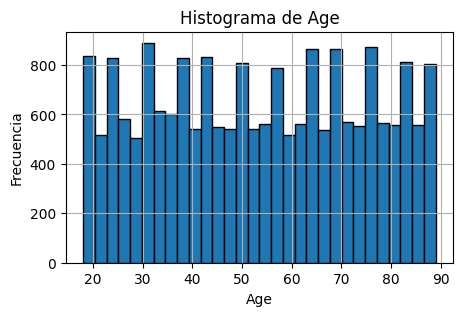

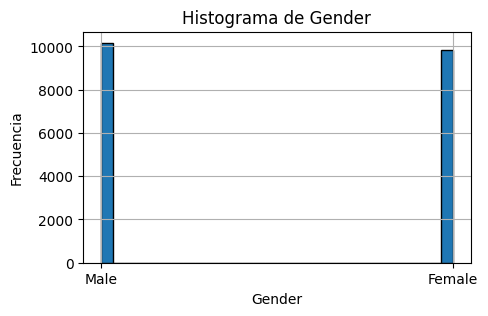

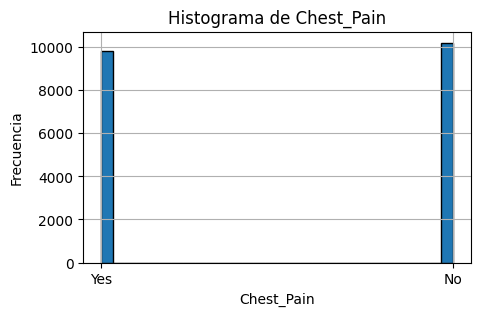

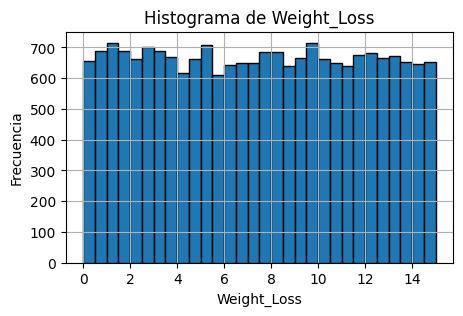

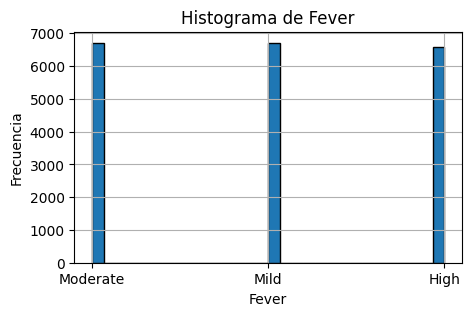

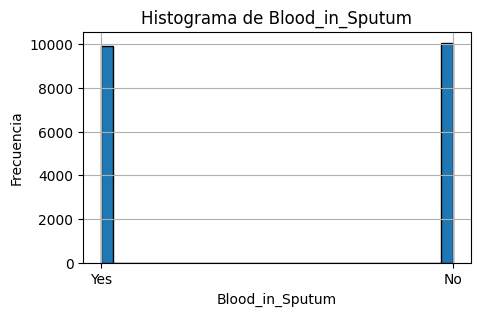

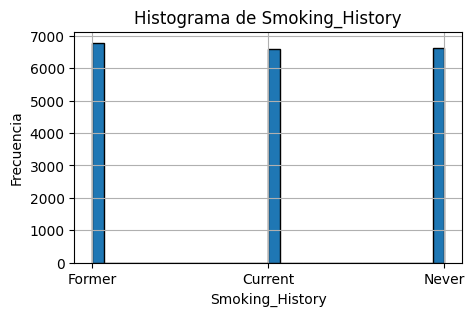

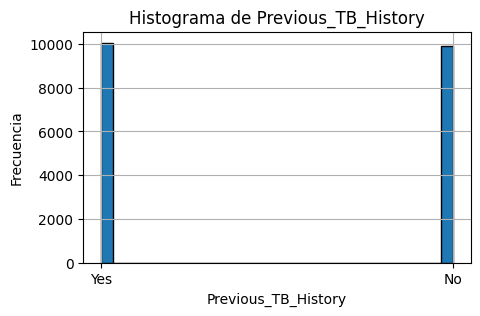

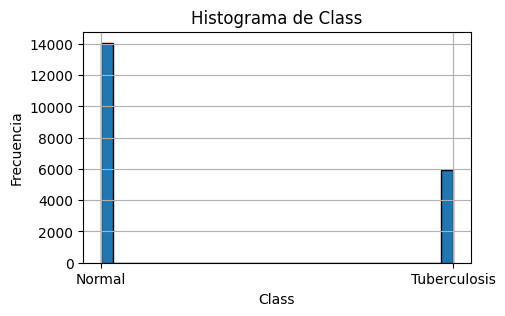

In [22]:
# Veamos primero los histogramas por atributo
import matplotlib.pyplot as plt

columns_to_plot = [col for col in dataset.columns if col != 'Patient_ID']

for column in columns_to_plot:
    try:
        plt.figure(figsize=(5, 3))
        plt.hist(dataset[column].dropna(), bins=30, edgecolor='black')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    except KeyError as e:
        print(f"Columna no encontrada: {e}")

Podemos ver que, tanto atributos numéricos como categóricos se encuentran distribuídos de manera cuasi-uniforme, por lo que no existen *outliers* en atributos específicos. Cabe la posibilidad de que existan en combinaciones de atributos, por lo que es lo que veremos a continuación.

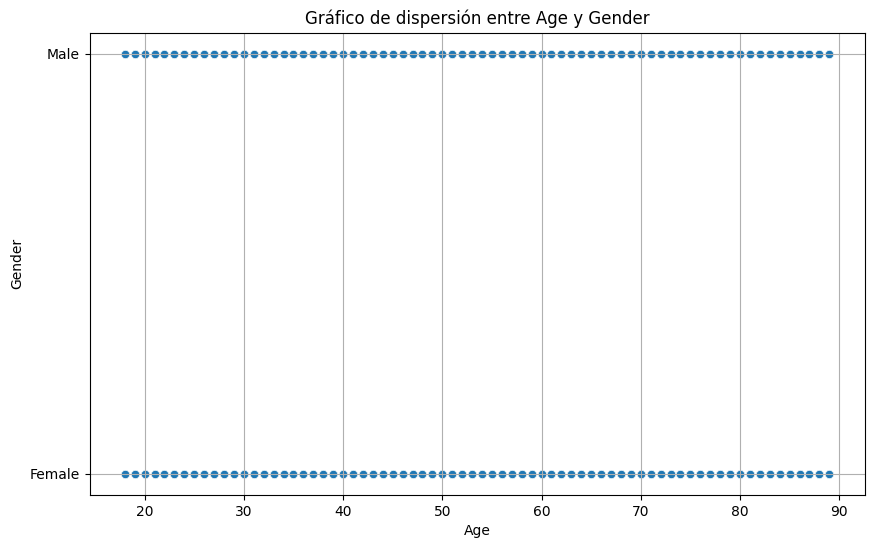

Combinaciones totales para Age y Gender: 144
Combinaciones con menos de 100 repeticiones para Age y Gender: 0



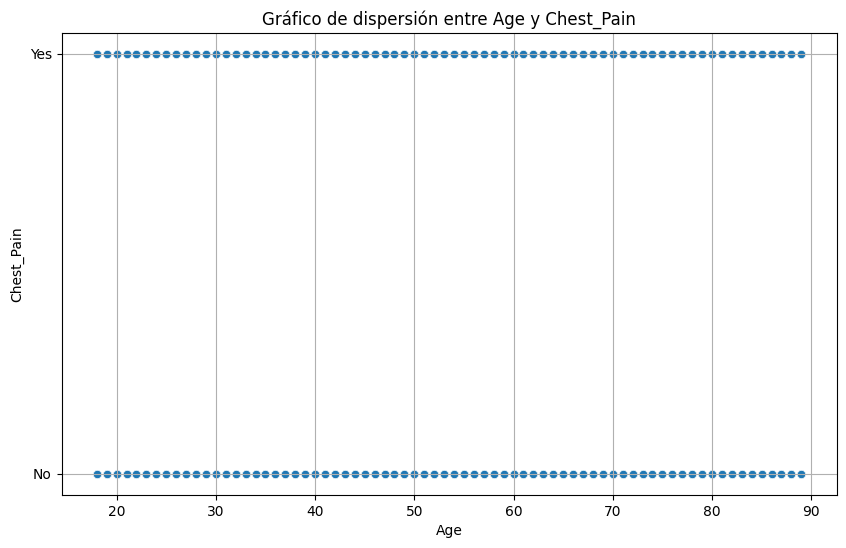

Combinaciones totales para Age y Chest_Pain: 144
Combinaciones con menos de 100 repeticiones para Age y Chest_Pain: 0



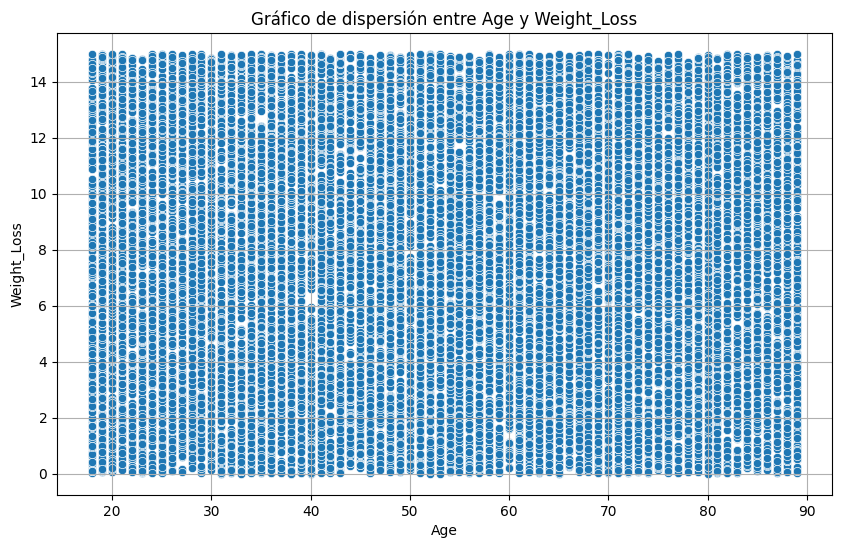

Combinaciones totales para Age y Weight_Loss: 18259
Combinaciones con menos de 100 repeticiones para Age y Weight_Loss: 18259



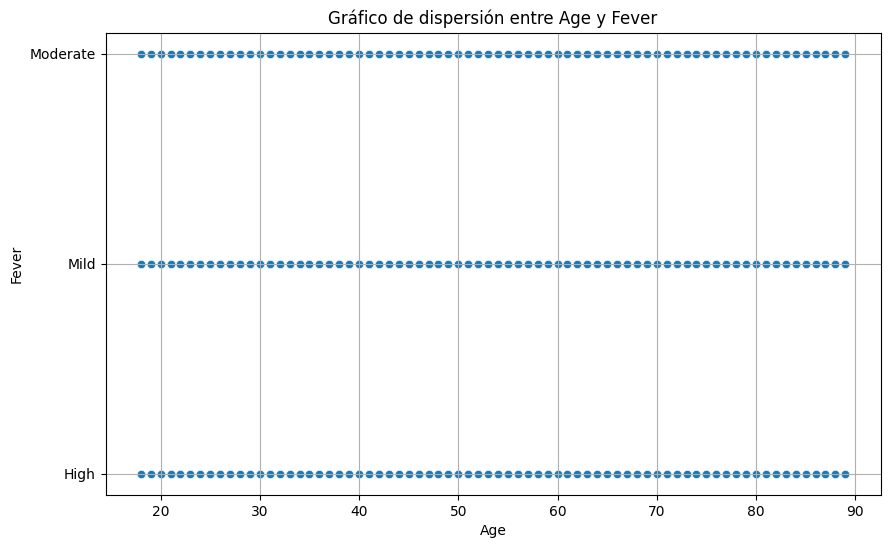

Combinaciones totales para Age y Fever: 216
Combinaciones con menos de 100 repeticiones para Age y Fever: 166



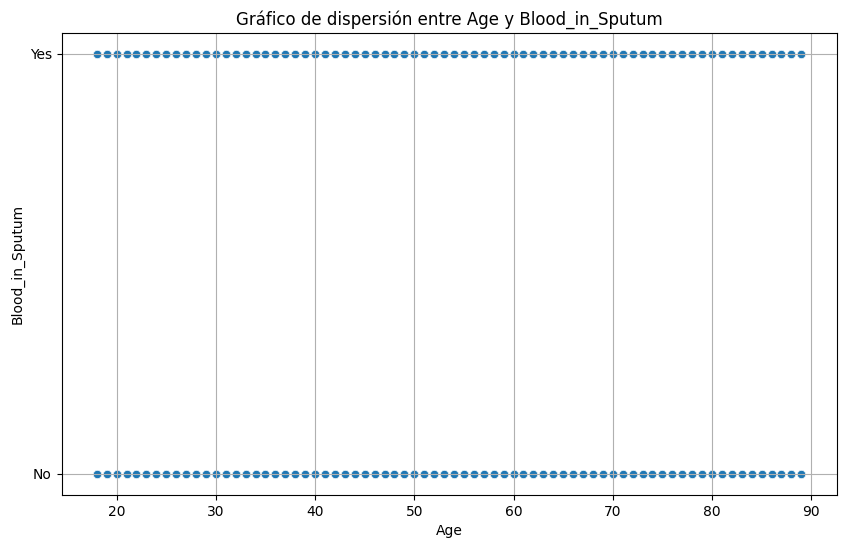

Combinaciones totales para Age y Blood_in_Sputum: 144
Combinaciones con menos de 100 repeticiones para Age y Blood_in_Sputum: 0



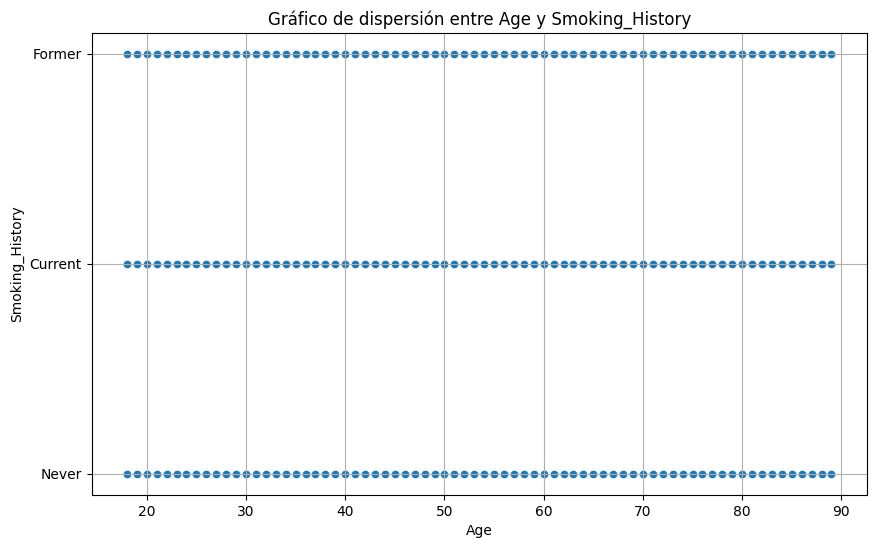

Combinaciones totales para Age y Smoking_History: 216
Combinaciones con menos de 100 repeticiones para Age y Smoking_History: 163



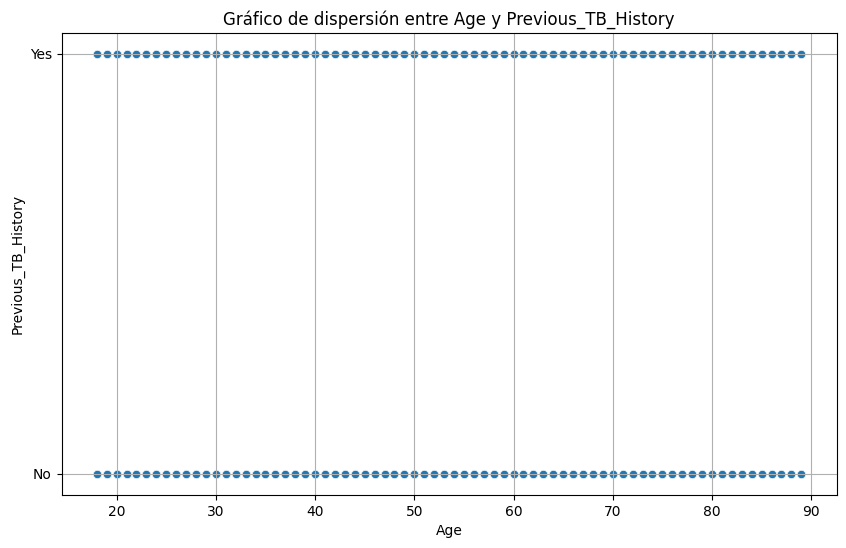

Combinaciones totales para Age y Previous_TB_History: 144
Combinaciones con menos de 100 repeticiones para Age y Previous_TB_History: 0



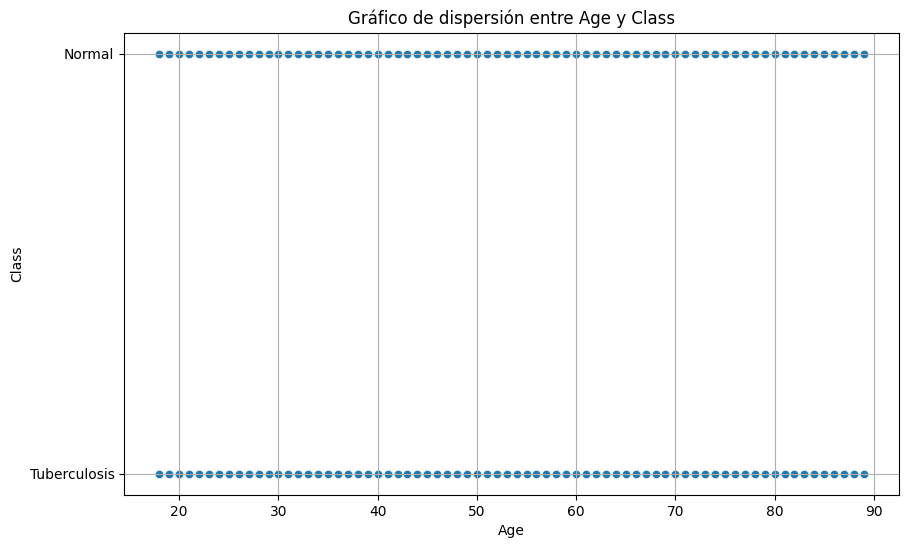

Combinaciones totales para Age y Class: 144
Combinaciones con menos de 100 repeticiones para Age y Class: 71



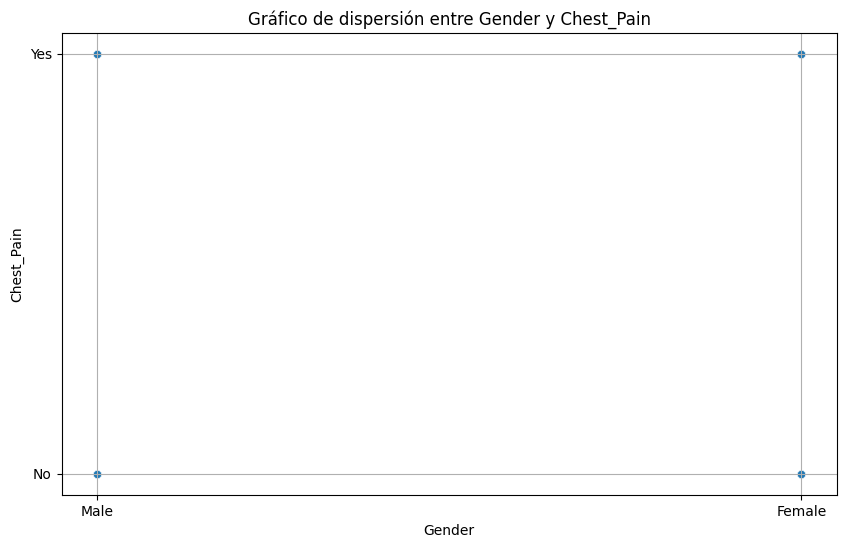

Combinaciones totales para Gender y Chest_Pain: 4
Combinaciones con menos de 100 repeticiones para Gender y Chest_Pain: 0



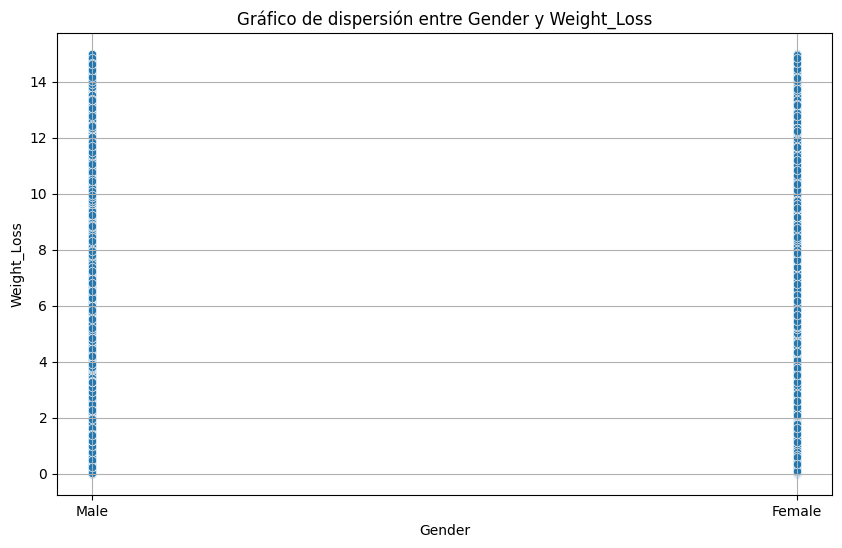

Combinaciones totales para Gender y Weight_Loss: 2997
Combinaciones con menos de 100 repeticiones para Gender y Weight_Loss: 2997



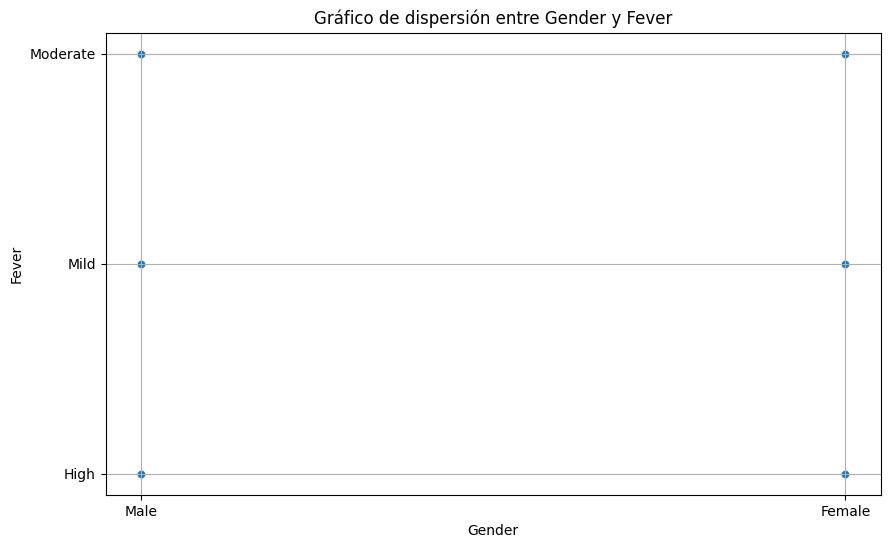

Combinaciones totales para Gender y Fever: 6
Combinaciones con menos de 100 repeticiones para Gender y Fever: 0



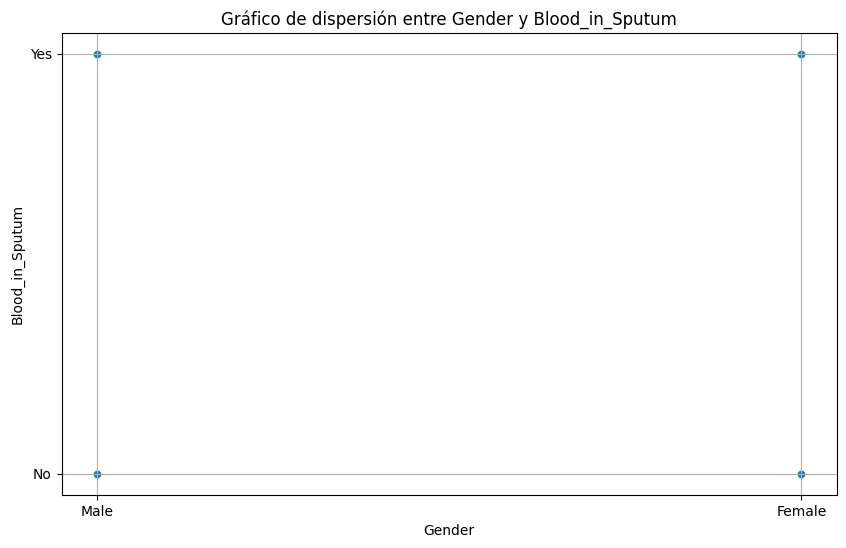

Combinaciones totales para Gender y Blood_in_Sputum: 4
Combinaciones con menos de 100 repeticiones para Gender y Blood_in_Sputum: 0



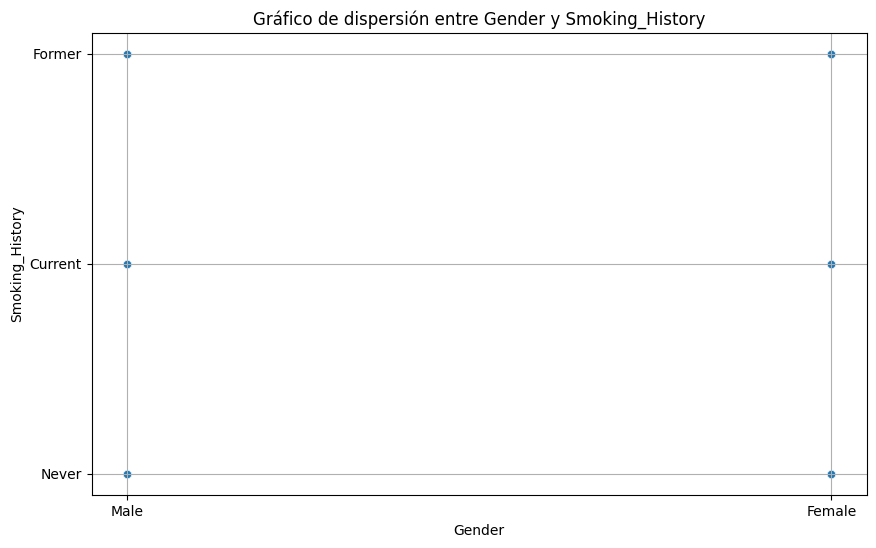

Combinaciones totales para Gender y Smoking_History: 6
Combinaciones con menos de 100 repeticiones para Gender y Smoking_History: 0



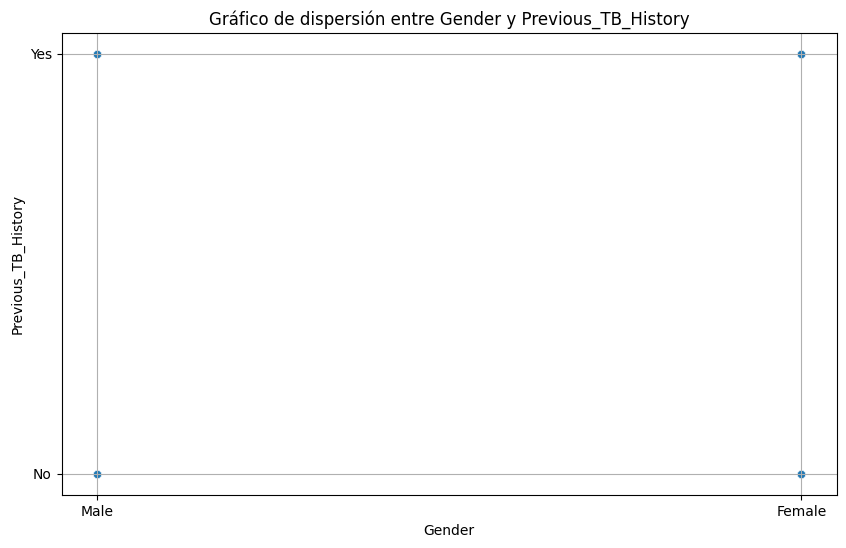

Combinaciones totales para Gender y Previous_TB_History: 4
Combinaciones con menos de 100 repeticiones para Gender y Previous_TB_History: 0



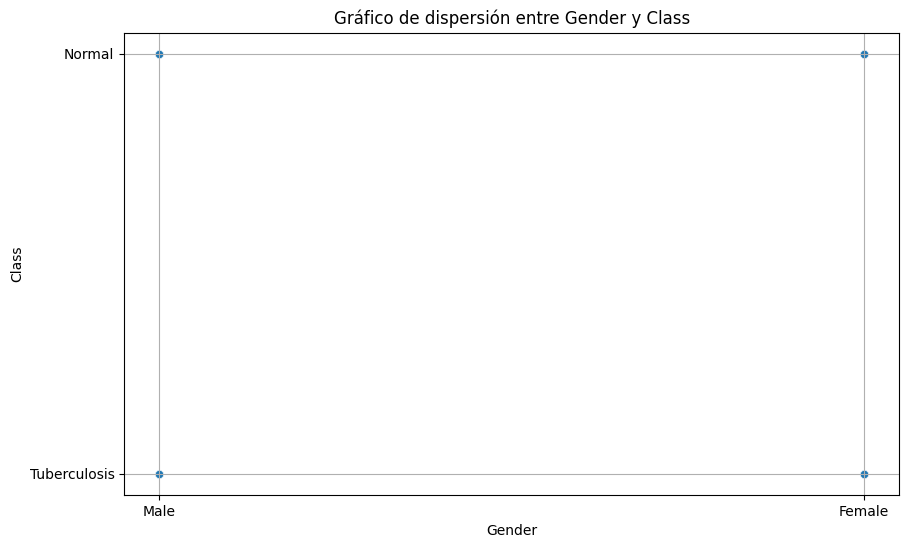

Combinaciones totales para Gender y Class: 4
Combinaciones con menos de 100 repeticiones para Gender y Class: 0



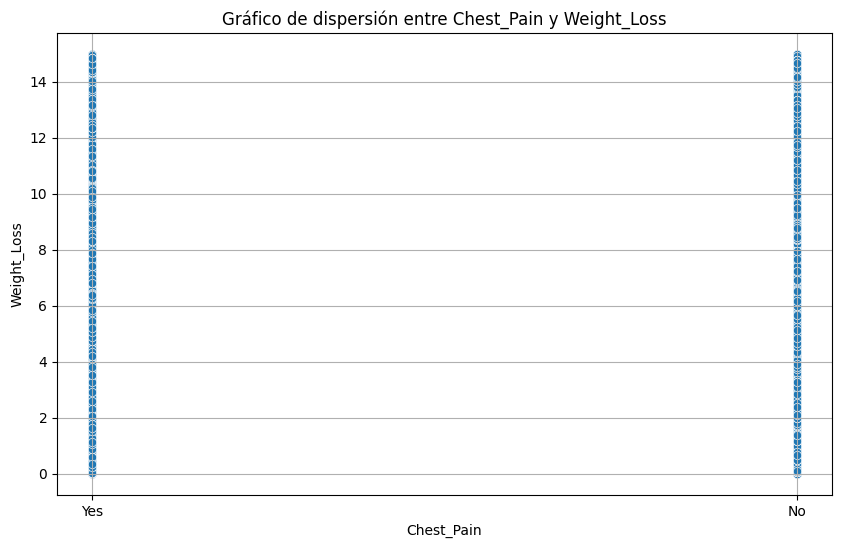

Combinaciones totales para Chest_Pain y Weight_Loss: 2999
Combinaciones con menos de 100 repeticiones para Chest_Pain y Weight_Loss: 2999



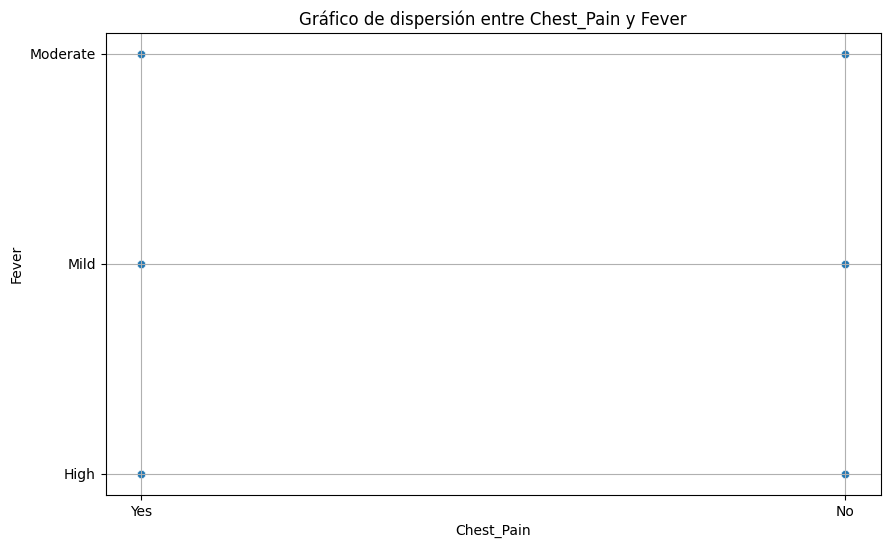

Combinaciones totales para Chest_Pain y Fever: 6
Combinaciones con menos de 100 repeticiones para Chest_Pain y Fever: 0



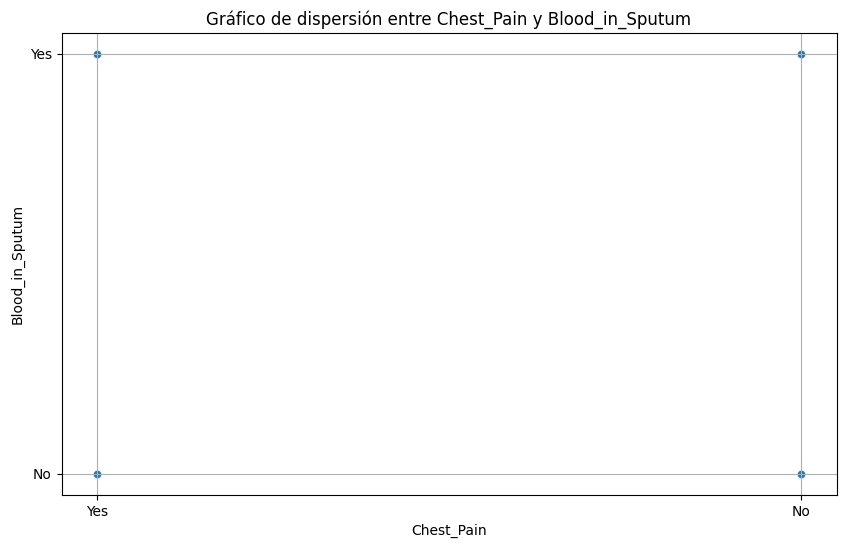

Combinaciones totales para Chest_Pain y Blood_in_Sputum: 4
Combinaciones con menos de 100 repeticiones para Chest_Pain y Blood_in_Sputum: 0



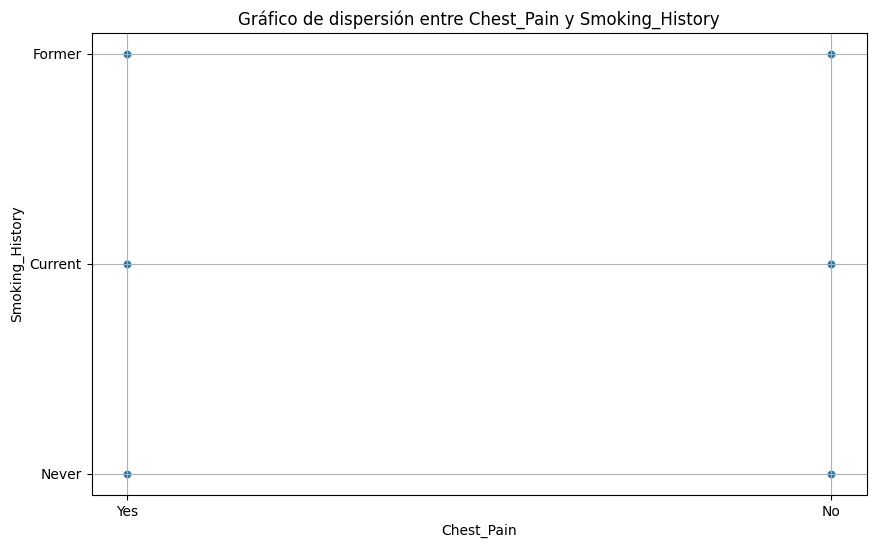

Combinaciones totales para Chest_Pain y Smoking_History: 6
Combinaciones con menos de 100 repeticiones para Chest_Pain y Smoking_History: 0



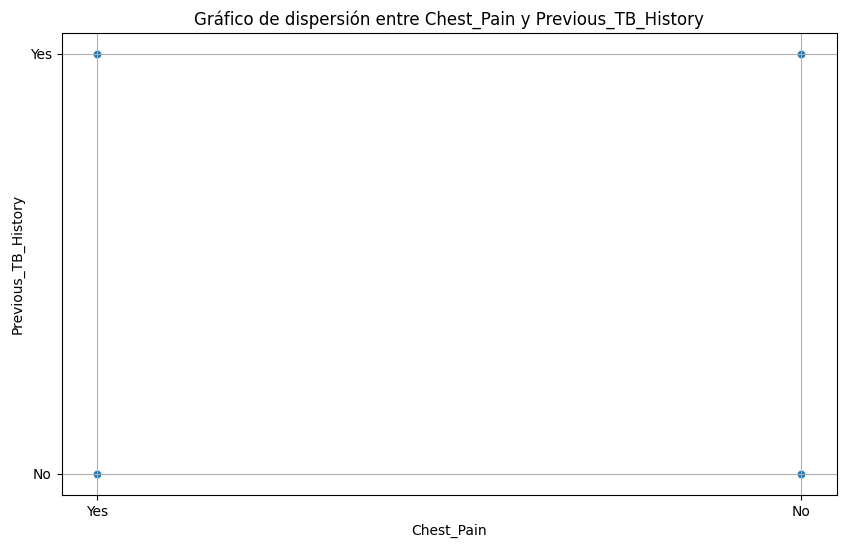

Combinaciones totales para Chest_Pain y Previous_TB_History: 4
Combinaciones con menos de 100 repeticiones para Chest_Pain y Previous_TB_History: 0



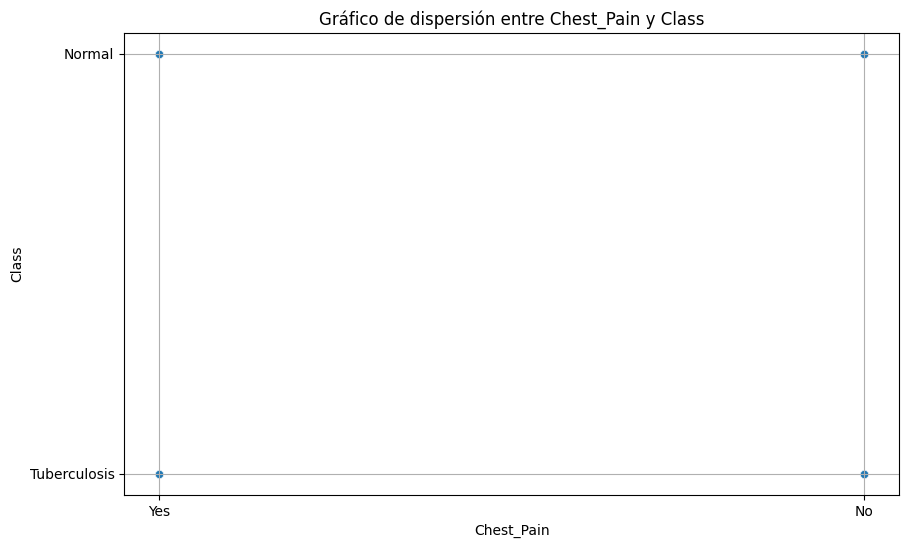

Combinaciones totales para Chest_Pain y Class: 4
Combinaciones con menos de 100 repeticiones para Chest_Pain y Class: 0



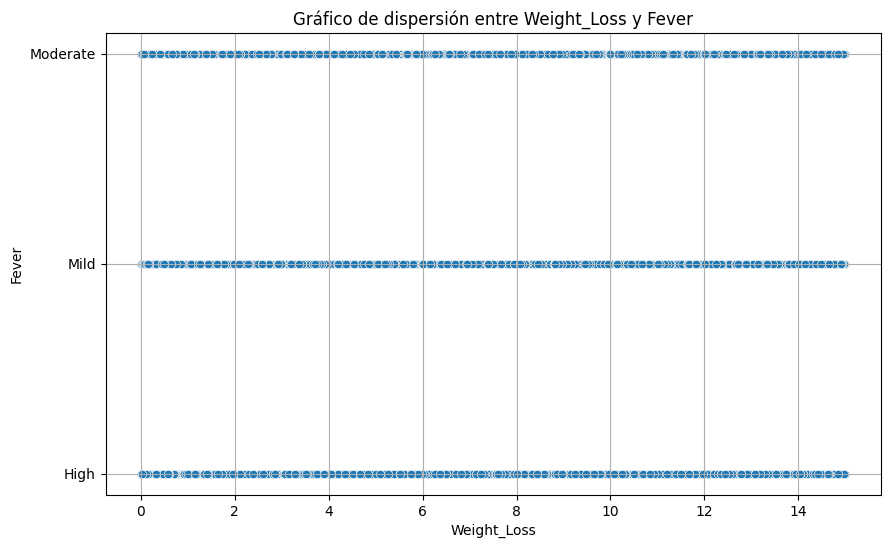

Combinaciones totales para Weight_Loss y Fever: 4457
Combinaciones con menos de 100 repeticiones para Weight_Loss y Fever: 4457



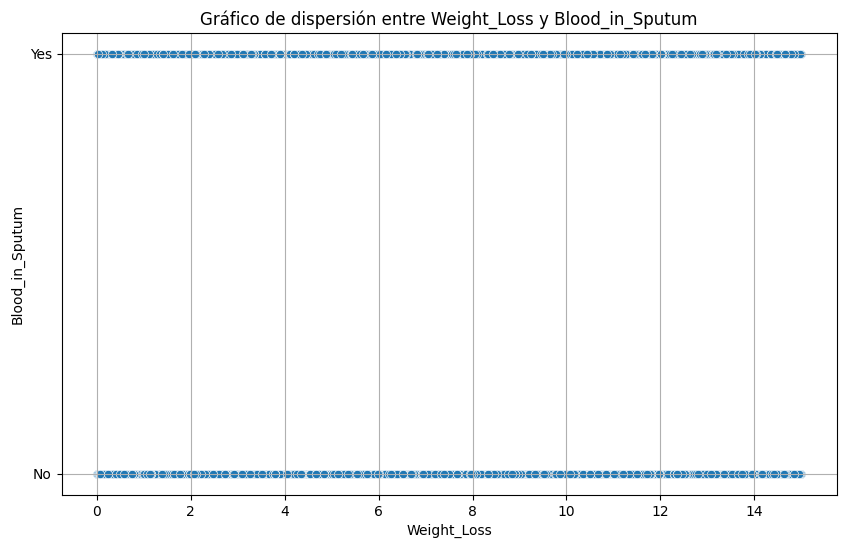

Combinaciones totales para Weight_Loss y Blood_in_Sputum: 2999
Combinaciones con menos de 100 repeticiones para Weight_Loss y Blood_in_Sputum: 2999



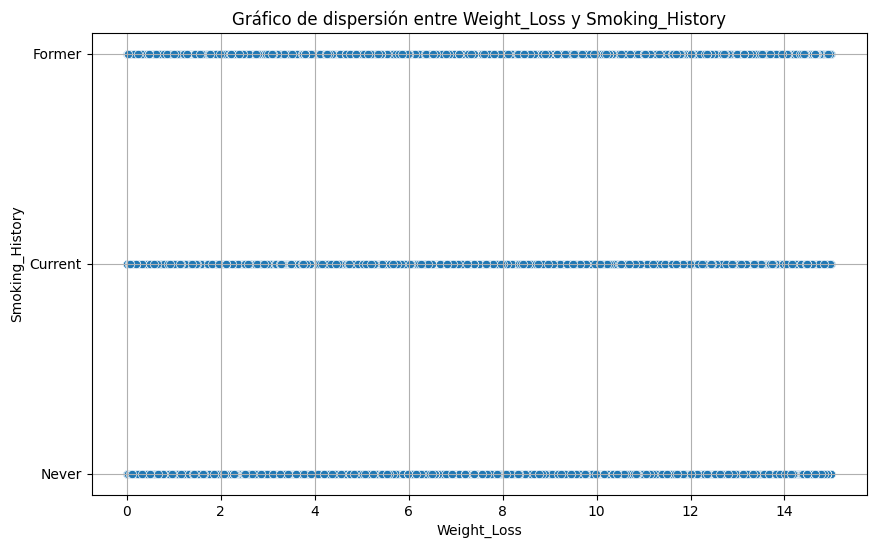

Combinaciones totales para Weight_Loss y Smoking_History: 4450
Combinaciones con menos de 100 repeticiones para Weight_Loss y Smoking_History: 4450



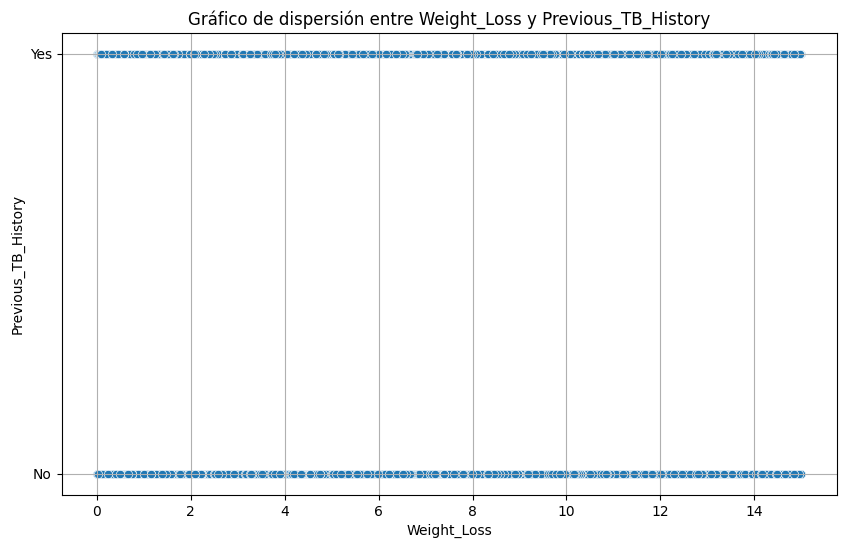

Combinaciones totales para Weight_Loss y Previous_TB_History: 2997
Combinaciones con menos de 100 repeticiones para Weight_Loss y Previous_TB_History: 2997



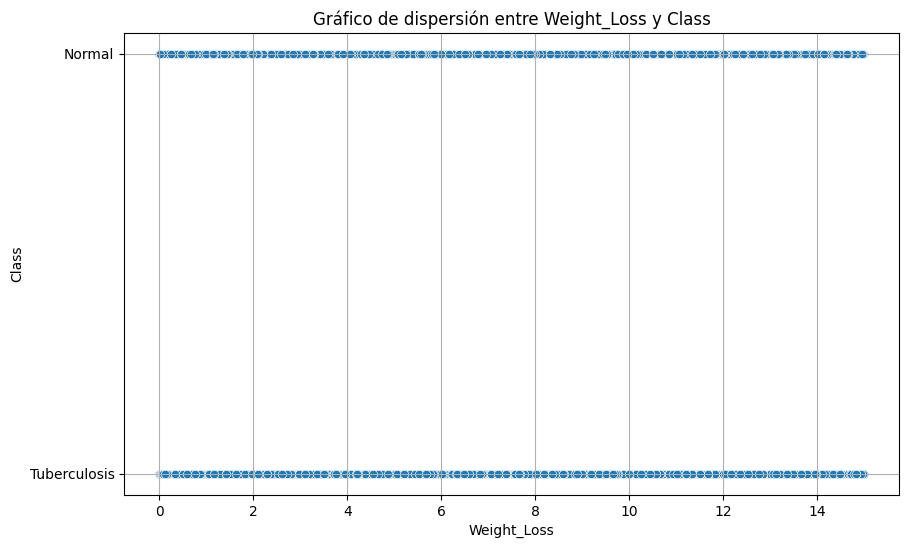

Combinaciones totales para Weight_Loss y Class: 2972
Combinaciones con menos de 100 repeticiones para Weight_Loss y Class: 2972



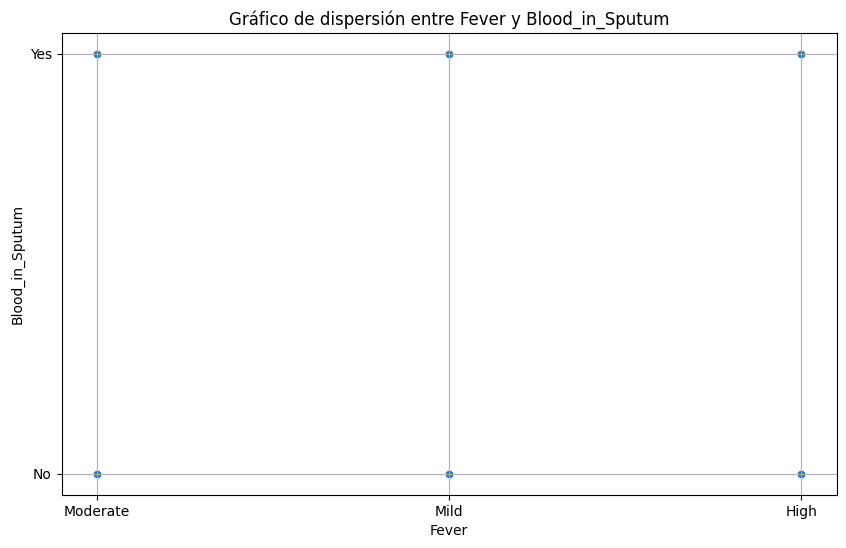

Combinaciones totales para Fever y Blood_in_Sputum: 6
Combinaciones con menos de 100 repeticiones para Fever y Blood_in_Sputum: 0



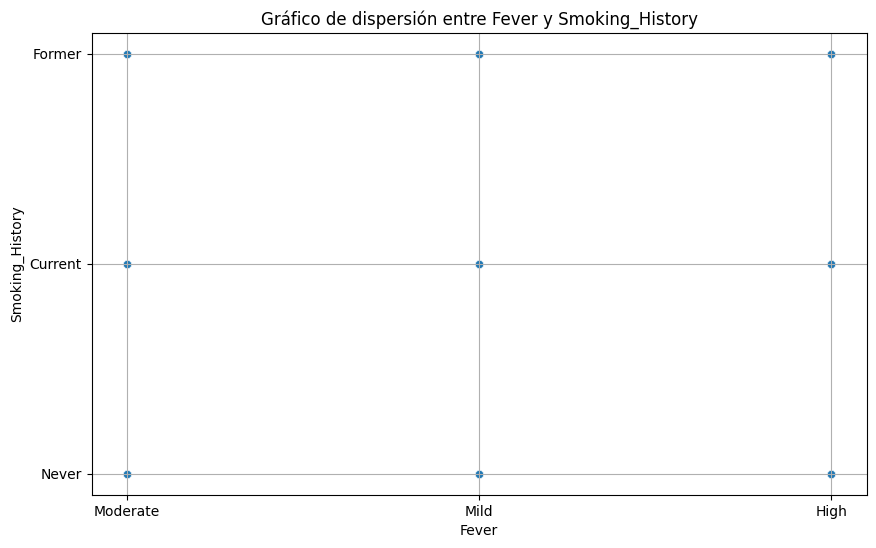

Combinaciones totales para Fever y Smoking_History: 9
Combinaciones con menos de 100 repeticiones para Fever y Smoking_History: 0



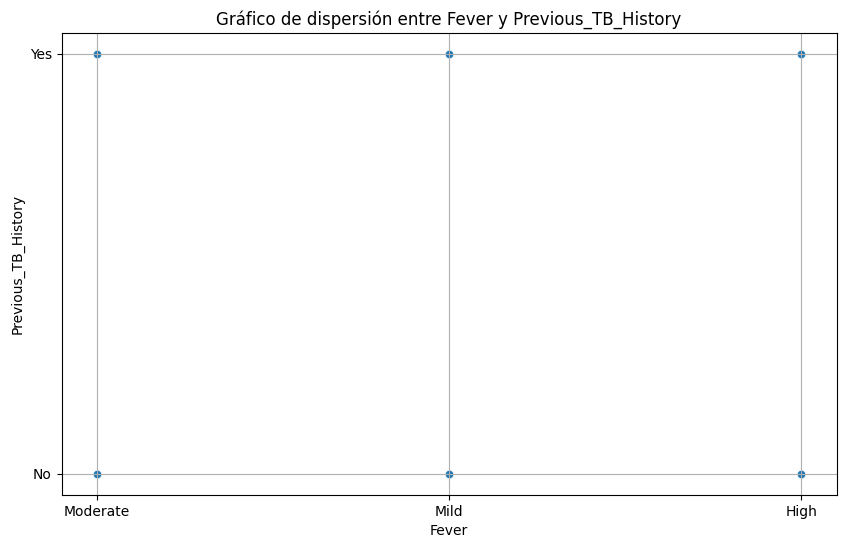

Combinaciones totales para Fever y Previous_TB_History: 6
Combinaciones con menos de 100 repeticiones para Fever y Previous_TB_History: 0



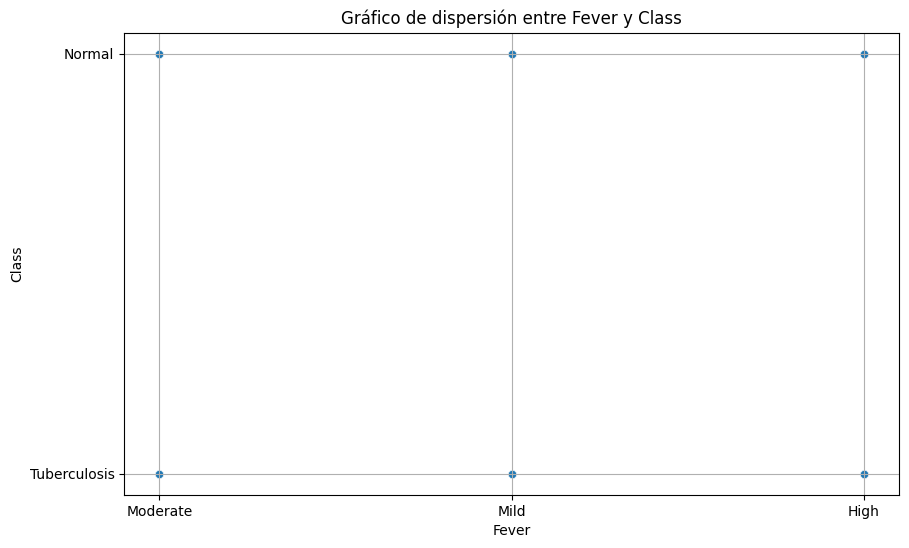

Combinaciones totales para Fever y Class: 6
Combinaciones con menos de 100 repeticiones para Fever y Class: 0



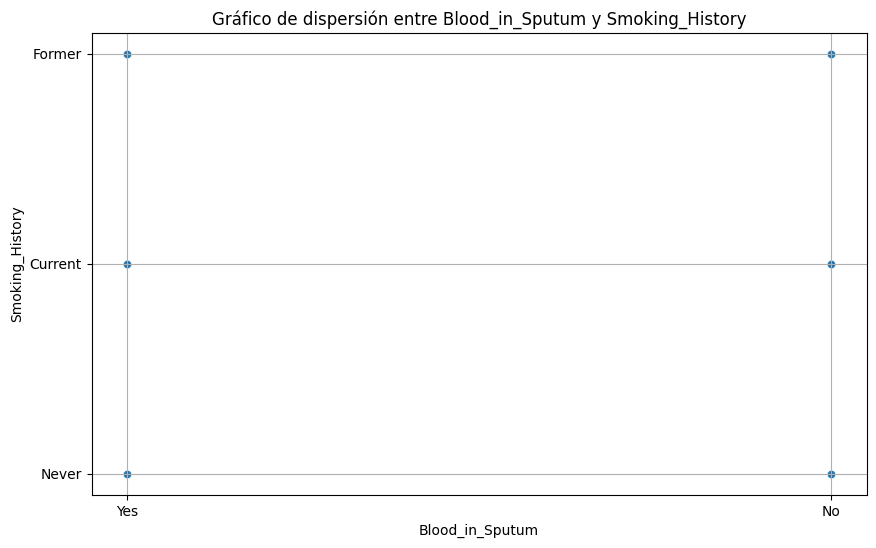

Combinaciones totales para Blood_in_Sputum y Smoking_History: 6
Combinaciones con menos de 100 repeticiones para Blood_in_Sputum y Smoking_History: 0



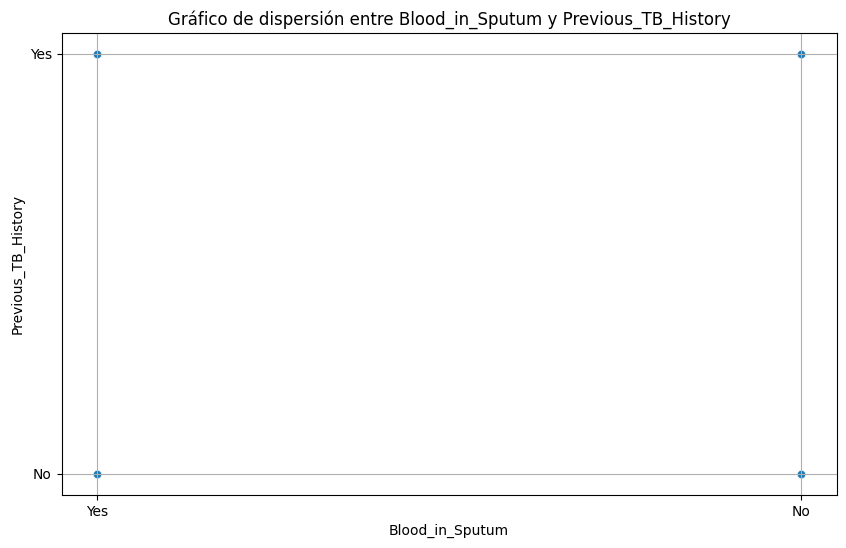

Combinaciones totales para Blood_in_Sputum y Previous_TB_History: 4
Combinaciones con menos de 100 repeticiones para Blood_in_Sputum y Previous_TB_History: 0



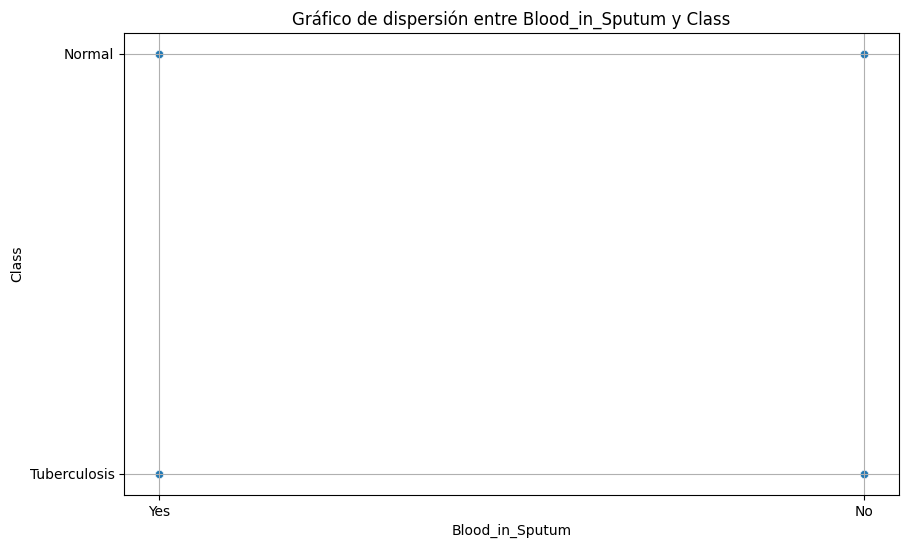

Combinaciones totales para Blood_in_Sputum y Class: 4
Combinaciones con menos de 100 repeticiones para Blood_in_Sputum y Class: 0



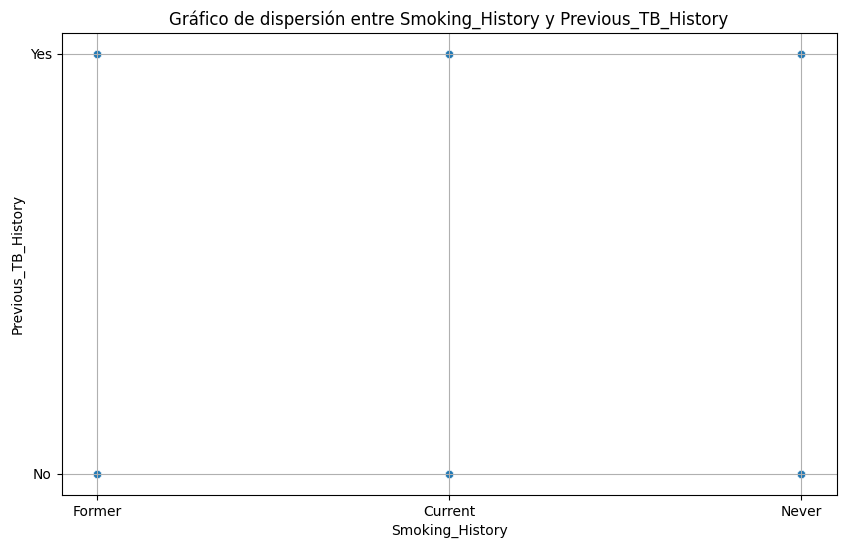

Combinaciones totales para Smoking_History y Previous_TB_History: 6
Combinaciones con menos de 100 repeticiones para Smoking_History y Previous_TB_History: 0



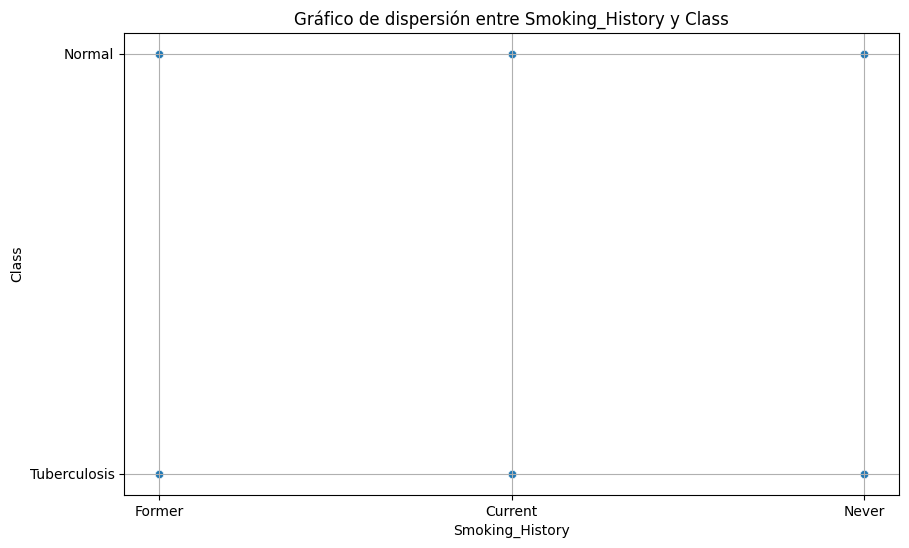

Combinaciones totales para Smoking_History y Class: 6
Combinaciones con menos de 100 repeticiones para Smoking_History y Class: 0



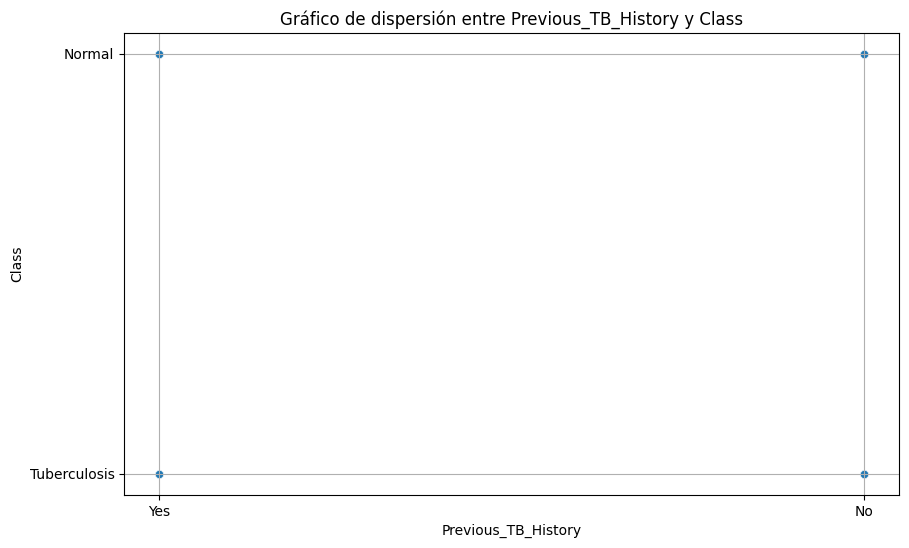

Combinaciones totales para Previous_TB_History y Class: 4
Combinaciones con menos de 100 repeticiones para Previous_TB_History y Class: 0



In [23]:
# Ahora debemos hacer un gráfico de dispersión por cada par de atributos
import seaborn as sns
min_counts = 100

for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=dataset, x=columns_to_plot[i], y=columns_to_plot[j])
        plt.title(f'Gráfico de dispersión entre {columns_to_plot[i]} y {columns_to_plot[j]}')
        plt.xlabel(columns_to_plot[i])
        plt.ylabel(columns_to_plot[j])
        plt.grid(True)
        plt.show()
        combinations, min_combinations = combinations_in_dataset(dataset, columns_to_plot[i], columns_to_plot[j], min_counts)
        print(f'Combinaciones totales para {columns_to_plot[i]} y {columns_to_plot[j]}: {len(combinations)}')
        print(f'Combinaciones con menos de {min_counts} repeticiones para {columns_to_plot[i]} y {columns_to_plot[j]}: {len(min_combinations)}\n')

Acá podemos ver que las combinaciones de atributos que tienen menos de $100$ repeticiones a través de todos los cuasi-identificadores son aquellos que incluyen o `Age` o `Weight_Loss`, por lo que es necesario a primera vista encargarnos de posibles *outliers*. Dicho esto, buscaremos la mejor forma de lograr una anonimización aceptable de este dataset.

¿Qué consideramos aceptable?

Ya que los valores dentro de cada atributo están distribuídos de manera pareja (es decir, para cada valor dentro de un atributo, la cantidad de ejemplos presentes es similar a la de cualquier otro valor dentro del mismo atributo), no es necesario que el valor de $k$ sea tan alto. Esto porque tenemos una mayor repetición de combinaciones.

En ese caso, la forma de proceder será agrupar los valores de `Age` y `Weight_Loss` en bins, reduciendo así la cantidad de datos con menos de $100$ repeticiones. Como se estableció anteriormente, el objetivo no será llegar a una $k$-anonimidad muy alta, pero sí logrando una $l$-diversidad superior a $1$

In [24]:
aux_df = dataset.copy()

# Probamos agrupar el peso de 3 en 3 kg

bins_w = [0, 3, 6, 9, 12, 15]
labels_w = ['0-3', '3-6', '6-9', '9-12', '12-15']

aux_df['Weight_Loss'] = pd.cut(aux_df['Weight_Loss'], bins=bins_w, labels=labels_w, right=False)

bins_a = [18, 30, 40, 50, 60, 70, 80, 90]
labels_a = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']


aux_df['Age'] = pd.cut(aux_df['Age'], bins=bins_a, labels=labels_a, right=False)


print('K-Anonimidad:',compute_anonimity_index(aux_df, quasi_identifiers))
print('L-Diversidad:',compute_diversity_index(aux_df, quasi_identifiers, "Class"))

K-Anonimidad: 29
L-Diversidad: 2


In [25]:
# El resultado anterior cumple con anonimizar el dataset, pero al ser tan
# grandes los grupos del peso, se pierde informacion

aux_df = dataset.copy()

# Asi, probamos de 1 en 1 kg

bins_w = range(16)
labels_w = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15']

aux_df['Weight_Loss'] = pd.cut(aux_df['Weight_Loss'], bins=bins_w, labels=labels_w, right=False)

bins_a = [18, 30, 40, 50, 60, 70, 80, 90]
labels_a = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']


aux_df['Age'] = pd.cut(aux_df['Age'], bins=bins_a, labels=labels_a, right=False)


print('K-Anonimidad:',compute_anonimity_index(aux_df, quasi_identifiers))
print('L-Diversidad:',compute_diversity_index(aux_df, quasi_identifiers, "Class"))

K-Anonimidad: 4
L-Diversidad: 1


In [26]:
# El resultado anterior mantiene la informacion y logra la k-anonimicidad,
# pero pierde la l-diversidad

aux_df = dataset.copy()

# Probaremos con pesos de 2 en 2 kg

bins_w = [0,2,4,6,8,10,12,15]
labels_w = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-15']

aux_df['Weight_Loss'] = pd.cut(aux_df['Weight_Loss'], bins=bins_w, labels=labels_w, right=False)

bins_a = [18, 30, 40, 50, 60, 70, 80, 90]
labels_a = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']


aux_df['Age'] = pd.cut(aux_df['Age'], bins=bins_a, labels=labels_a, right=False)


print('K-Anonimidad:',compute_anonimity_index(aux_df, quasi_identifiers))

print('L-Diversidad:',compute_diversity_index(aux_df, quasi_identifiers, "Class"))


K-Anonimidad: 15
L-Diversidad: 2


Logramos asi una $k$-anonimicidad de 15 y una $l$-diversidad de 2

Describa coloquialmente las generalizaciones que realizó (justificando las decisiones que tomaron), y los valores de $k$ y $\ell$ que obtuvo. Describa, además, cuáles fueron los mayores desafíos/obstáculos que encontró en este proceso de anonimización.

De manera rápida, las generalizaciones que se realizaron sobre los cuasi-identificadores fueron dos:

1. Una agrupación en la columna Weight_Loss en tramos de $2[kg]$
2. Una agrupación en las edades en tramos de $10$ años, exceptuando el primer grupo ($[18,30]$) y el último grupo ($[80, +\infty)$)

Estas decisiones se tomaron de acuerdo a los valores que se obtenían en $l$-diversidad ya que, como se había mencionado anteriormente, el $k$-anonimato no era crucial que fuese un valor tan alto dada la dispersión pareja de los atributos. Es por esto que un valor suficiente para nosotros era un $l$-diversidad $\geq 1$ que se logró finalmente por ensayo y error (también porque sólo teníamos 2 posibles valores para nuestro atributo sensible crítico). Además, si vemos el valor de la entropía:

In [28]:
print(f'Valor de la diversidad entrópica: {l_entropic_diversity(aux_df, quasi_identifiers, "Class")}')

Valor de la diversidad entrópica: 0.17884491271684755


<ipython-input-20-4c4cf2600a4b>:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(qis)[target].value_counts(normalize=True).reset_index(name='probabilidad')
<ipython-input-20-4c4cf2600a4b>:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entropic_diversity = grouped.groupby(qis)['entropia'].sum()


Podemos ver que es un valor cercano a cero, lo que significa que se tiene poca variabilidad dentro de los datos, preservando así la utilidad del dataset.

Para poder realizar la anonimización del dataset fue crucial conocer de qué se trataba y cuáles eran los atributos que lo formaban, levantándose la discusión sobre qué atributos podían llegar a considerarse como cuasi-identificadores, cuáles como sensibles y no sensibles, ya que es más una categorización subjetiva que objetiva.

Luego el desafío era indagar en internet y poder encontrar algún dataset que hablase sobre lo mismo que el que estábamos trabajando y usarlo para reidentificar pacientes. Esto fue una de las labores más tediosas ya que dependía mucho más de lo que estaba disponible en internet que lo que podíamos hacer o desarrollar nosotros por cuenta propia.

Finalmente el tema de poder anonimizar requirió un estudio adicional sobre el dataset y el cómo manejar posibles *outliers* que se presentaran, manejando también los índices de $k$-anonimato y $l$-diversidad de la manera apropiada.

Dejamos de lado el trabajar con el resto de atributos sensibles porque consideramos que era mucho más crítico trabajar con el que era indicativo de tuberculosis. Cabe la posibilidad de que hubiésemos considerado todos los atributos sensibles para el cálculo de $l$-diversidad, obteniendo así un dataset más generalizado a costa de la pérdida de mayor información que la que se termina ofreciendo.